# Linear regression

In this lab we will practice implementing linear regression and mixed-effects models in R.

## Goals of this lab:
* Learn to use the _lm_ function
* Learn to use the _predict_ function

This lab draws from the practice sets at the end of Chapter 3 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." and Chapter 1 in Bates, D., Maechler, M., Bolker, B., & Walker, S. (2014). "lme4: Linear mixed-effects models using Eigen and S4. R package version:, 1(7), 1-23.





--- 
# Simple linear regression with a single predictor

<br>
First, we will look at a simple case, where $X$ has only one predictor (i.e., p = 1). For these first examples we will be using the [_MASS_](https://cran.r-project.org/web/packages/MASS/MASS.pdf) and [_ISLR_](https://cran.r-project.org/web/packages/ISLR/index.html) libraries. 

In [3]:
# If you haven't already installed the ISLR package do so now (by uncommenting the line)
# install.packages("ISLR")

# Load the namespace for these packages and attach them to the search list 
library(MASS)
library(ISLR)
library(ggplot2)

Let's start with some simple linear regression models from the _MASS_ library. In particular let's use the Boston data set, which records median house value (_medv_) for 506 neighborhoods around Boston. We will want to see how other factors actually predict median housing prices.
<br>
If you want to visualize the data set first, use the _fix()_ function like so. (Note: this won't work in the Jupyter notebook environment, but will work in RStudio).

In [2]:
# fix(Boston)

Let's take a look at all the variables in the _Boston_ data set

In [2]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

You can also also take a look at the description for this data set using the `help()` function or `?` shortcut. This will create a separate window that will give you the relevant information about any data set, libarary, or function in r.

In [4]:
# help(Boston)
# ?Boston

We touched briefly on this dataset in the previous lecture. The variables are

* **crim:** per capita crime rate by town.

* **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.

* **indus:** proportion of non-retail business acres per town.

* **chas:**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* **nox:** nitrogen oxides concentration (parts per 10 million).

* **rm:**  average number of rooms per dwelling.

* **age:** proportion of owner-occupied units built prior to 1940.

* **dis:**  weighted mean of distances to five Boston employment centres.

* **rad:**  index of accessibility to radial highways.

* **tax:** full-value property-tax rate per \$10,000.

* **ptratio:** pupil-teacher ratio by town.

* **lstat:** percentage of the population that is lower SES.

* **medv:** median value of owner-occupied homes in \$1000s.

[...]

<br>
This data is sampled from 506 neighborhoods (i.e., n=506). The full model that predicts median house value has 13 predictor variables (i.e., p=13).

## Model fitting

Now we want to use the built-in _lm_ function in r. We already went over this a little bit in the recitation tutorial about model objects. But let's go a bit more in-depth.

First, let's do some basic analysis. 

In [5]:
# To get more information on the lm function execute this cell
# help(lm)

In [6]:
# Making variables accessible to the workspace
# attach(Boston) 

__Important Note__: `attach` allows you to simply type the name of a variable within a dataset instead of using the ```dataset$variable``` syntax. 
While this reduces the typing burden, it can also lead to confusion, so use this command judiciously.
<br>
For example, you can imagine that if you attach several different datasets, then some may have the same variable names, overwriting the variables within the previously attached datasets. This places a lot of importance on the order of attachment. As a precautionary measure, I would not recommend using this command if you plan to use more than one dataset in a workspace. There are other ways to minimize the typing involved, such as using the ```function(arguments, data=dataset_name)``` syntax. 
<br>
<br>
For the sake of clarity, I won't use the `attach` function here, but know that it is an option.

Let's use the built-in `lm` function to look at the relationship between poverty (`lstat`) and median house value (`medv`). 
<br>
**Note:** you can use ggplot2 or the built-in `plot`function for data exploration

As an initial step, we can take a preliminary look at scatterplots across all pairs of our variables. We can simply do this by using the pairs functions

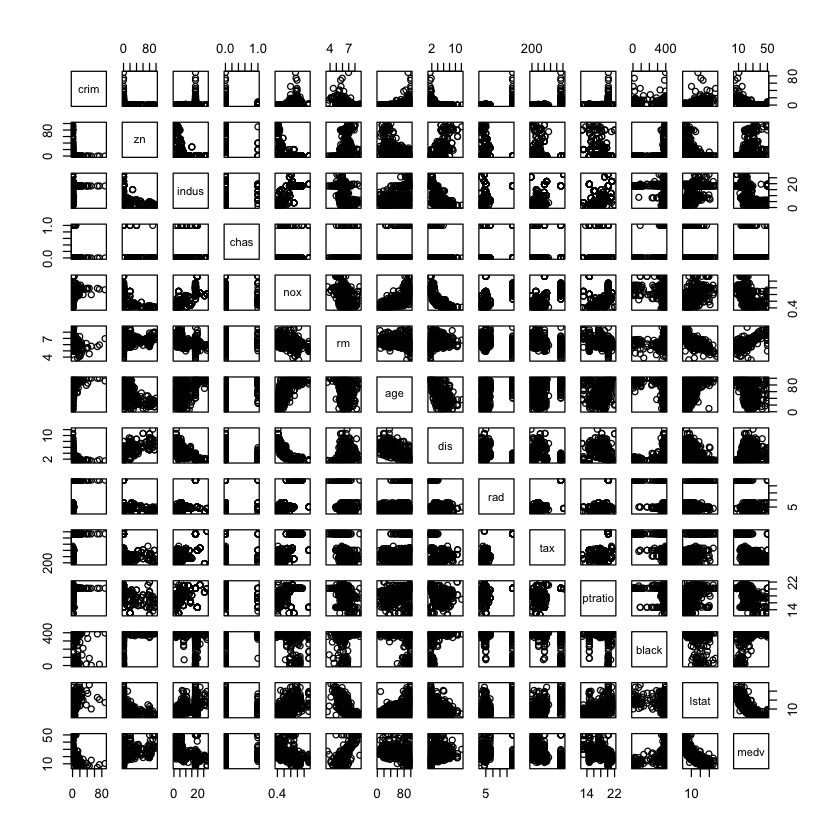

In [9]:
pairs(Boston)

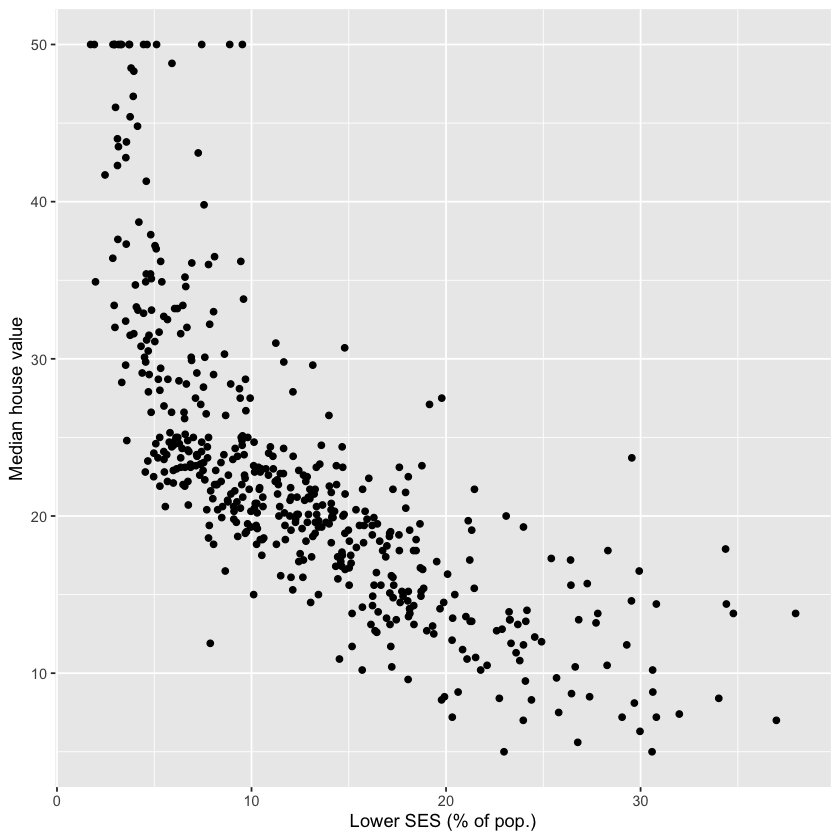

In [3]:
# Plot the joint distribution
# options(repr.plot.width=4, repr.plot.height=4)
# plot(lstat, medv, xlab="Lower status of population (percnet)", ylab="Median house value")

ggplot(aes(lstat, medv), data=Boston) + 
geom_point() + 
xlab('Lower SES (% of pop.)') + 
ylab('Median house value')

Now let's build a model object using _lm_ that captures this simple relationship. Remember that the output from the _lm_ function is an object that contains all the information about the model that you trained.

In [4]:
# Let's try a simple linear model
lm.fit = lm(medv~lstat, data=Boston)

# In order to see the results, use the summary function
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


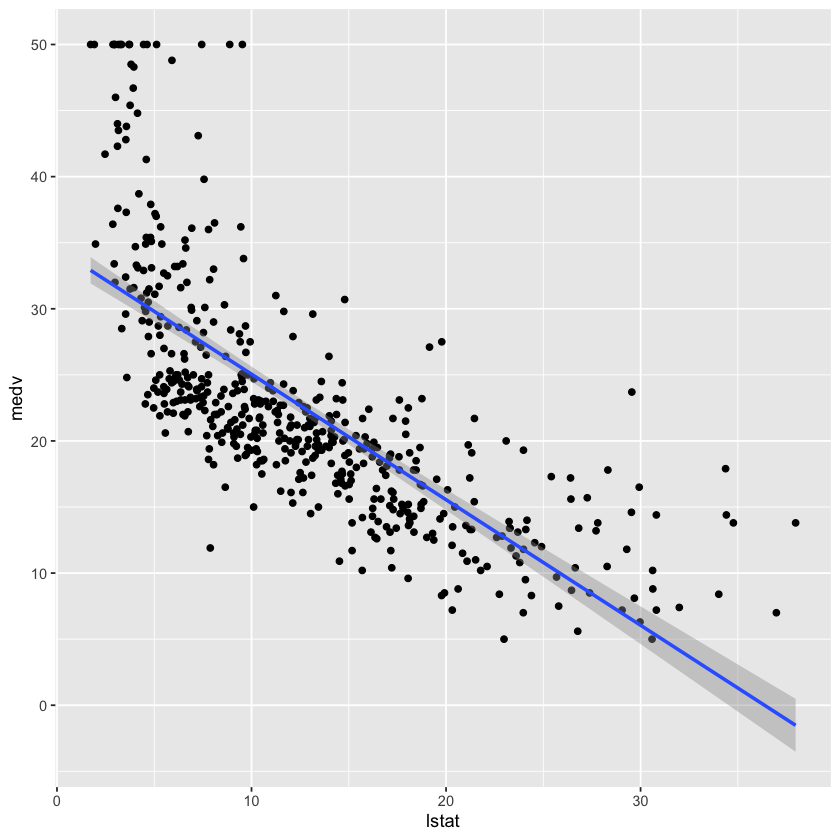

In [6]:
###you can also add the fit model in your ggplot to show both the line fitted as well as the
###uncertainty around the fitted line.
ggplot(aes(lstat, medv), data=Boston) + 
geom_point() + 
geom_smooth(method = 'lm')

## Inference

The coefficients table tells us that the effect of _lstat_ on _medv_ is statistically significant. We can use the `coef` function to extract the estimated regression coefficients.

In [8]:
# Just grab the regression coefficients themselves
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

We can also easily estimate the confidence intervals on the coefficients from the model using the `confint` function.

In [10]:
# In order to estimate the confidence interval on the 
# regression coefficients we will use confit
# help("confint") # Uncomment to see information on this function
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Does the 95% confidence interval for the `lstat` coefficient contain zero? 
<br>
Do you accept or reject the null hypothesis that local SES level associates with median house value?

## Prediction

Along with inferring the effect of _lstat_ on _medv_ we can also use the model that we just trained to predict the house value for specific SES values. For this we will use the `predict` function.

In [7]:
# We want to predict house value at specific lstat levels
# help("predict") # Uncomment to see how the function works

# Here we will predict what the house value will be if 
# the lstat for the neighborhood is 5, 10, or 15 percent.

ses_input_values = data.frame(lstat=c(5,10,15)) #specific SES values that you want a prediction for 
prediction_table = data.frame(predict(lm.fit, ses_input_values, interval = 'confidence'))  #calling the predict function 

pred_input_table = cbind(ses_input_values, prediction_table) #bind the input and prediction dataframes by column 

colnames(pred_input_table) = c('ses_input','predicted fit','lower_CI_bound', 'upper_CI_bound') #use informative column names 
round(pred_input_table,2) #display rounded values

,ses_input,predicted fit,lower_CI_bound,upper_CI_bound
,<dbl>,<dbl>,<dbl>,<dbl>
1,5,29.80,29.01,30.60
2,10,25.05,24.47,25.63
3,15,20.30,19.73,20.87


The predicted _medv_ values for each of the three _lstat_ values are returned, along with the lower (_lwr_) and upper (_upr_) bounds of the 95% confidence interval of those predictions (i.e., we are 95% confident that the real value rests between those two bounds). For example, when _lstat_=10, we are 95% confident that your house value will be between \$24.47k and \$25.63k.

<br>
## Plotting

So far in this lab we have:

1. Estimated a model.
2. Inferred the estimated effect ($\hat{\beta}$) of a predictor (_lstat_ or SES) on a response variable (_medv_ or median house value).
3. Generated predictions using this model.

Now let's learn some tools for visualizing the effects.

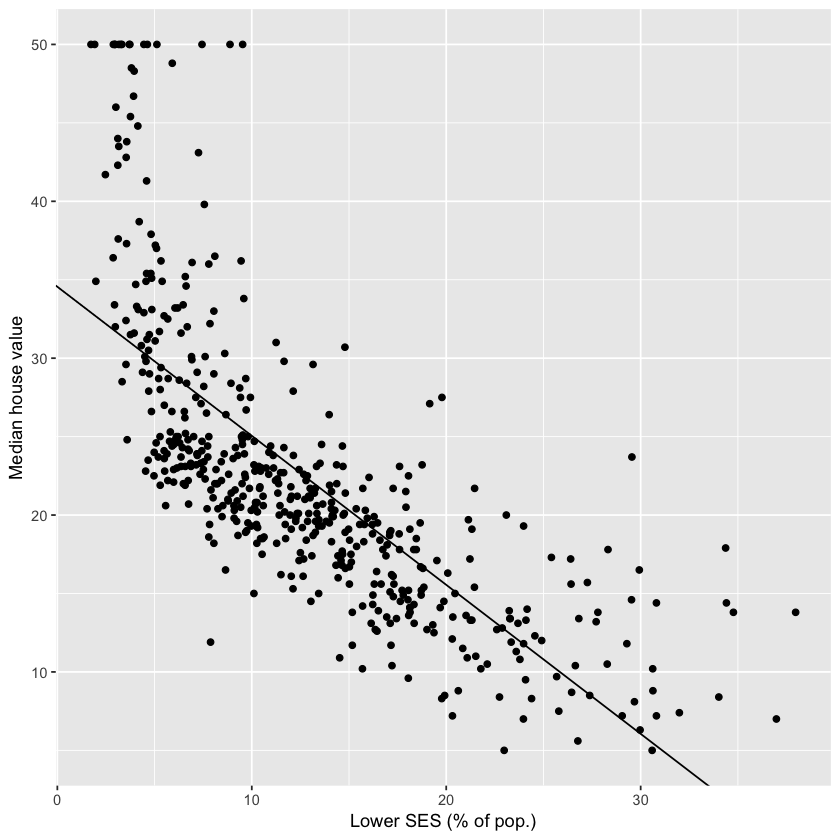

In [12]:
# #Let's plot the regression line against the data
# plot(lstat, medv,xlab="Lower status of population (percent)", ylab="Median house value")

# # help("abline") # Uncomment to see how the function works
# abline(lm.fit)

ggplot(aes(lstat, medv), data=Boston) + 
geom_point() + 
geom_abline(intercept = coef(lm.fit)[1], slope = coef(lm.fit)[2]) + 
xlab('Lower SES (% of pop.)') + ylab('Median house value') 

If you want a comprehensive visualization of the model, you can apply the base R plot command to the _lm.fit_ model object. 

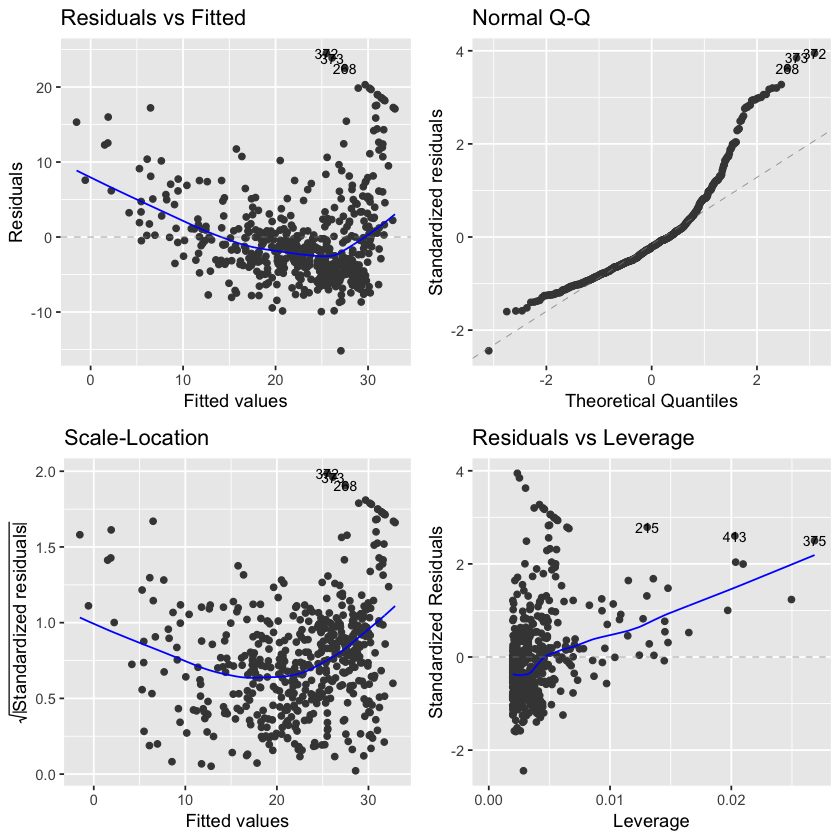

In [13]:
###you can use the plot function to show all the residual plots in order to check our assumptions.
plot(lm.fit)

###alternatively, you can also use a package to plot them. The plots are identical
library(ggfortify) #load a ggplot library that can plot model diagnostics  

autoplot(lm.fit, label.size = 3)

Notice we get four plots that reveal different aspects of the model.

1. **Residuals vs. Fitted values:** We are looking for a generally flat line here, which would indicate a strictly linear data set.

2. **Q-Q Plot:** This is on the residuals and is used to validate your assumption that $Y$ is normally distributed. Note that the residuals are normalized to be standard normal (i.e., z-score transformed).

3. **Scale-location:** This is similar to the first plot, but the residuals are rescaled to be positive. This helps you to see if any non-linearities in the model are driven by tails in the residual distribution.

4. **Residuals vs. Leverage:** Here we apply the leverage statistic to see if there are any high-leverage values that are driving the model fits. Remember, you want to look for clusters of extreme points in the x-dimension here.

If you want to explore these values in more detail, I suggest getting comfortable with the `residuals`, `rstudent`, and `hatvalues` functions.

---
# Regression with multiple predictors

<br>
In the example above we fit a model where p = 1. 

$$ Y_{medv} = \hat{\beta_0} + \hat{\beta_1}X_{lstat} + \epsilon $$

Now let us explore the case where p > 1.

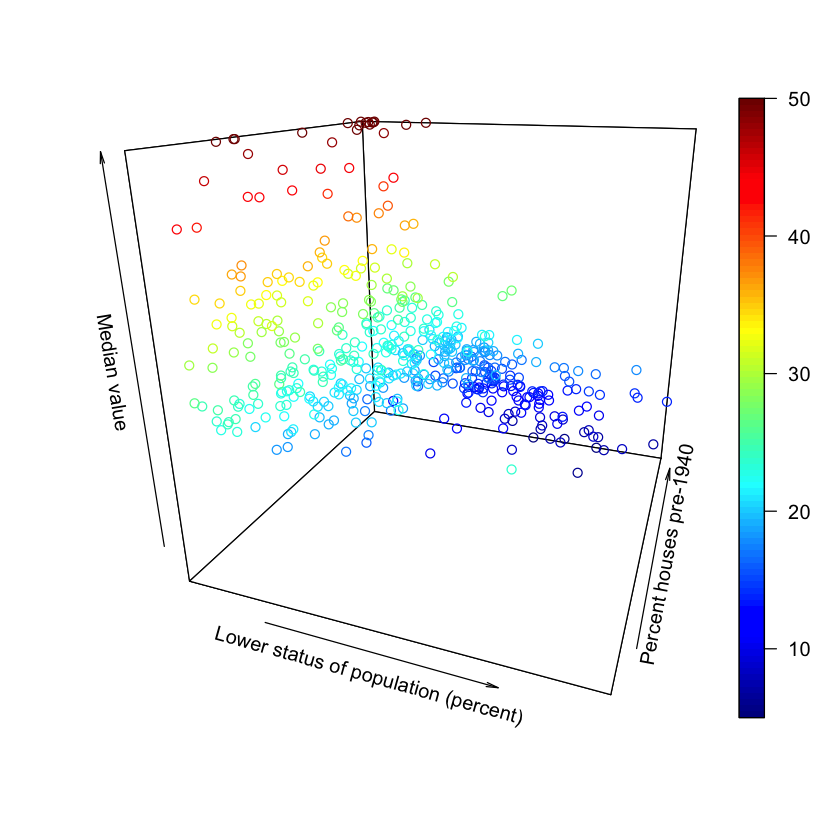

In [14]:
# Let's plot some relationships first.
# install.packages("plot3D") # Uncomment if this is not installed

library(plot3D)
# Let's look at the relationship between average house age and 
# neighborhood SES on house value

scatter3D(Boston$lstat, Boston$age, Boston$medv, phi=20, theta=20, xlab="Lower status of population (percent)", ylab="Percent houses pre-1940",zlab="Median value")
#phi controls tilt and theta controls angle

Interpeting the 3 dimensional scatterplot is the same as interpreting the 2 dimensional plot we showed above. You want a "football" shaped clustering where changes in _medv_ follow changes in the other two variables. So here, as the percentage of the population with low SES increase and the age of houses increases, the median value of houses goes down.


So it's clear that adding _age_ seems to also explain _medv_. We can confirm this by adding _age_ as a predictor in our model.

In [15]:
# Now let's try to quantify it
lm.fit = lm(medv~lstat+age, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


Notice that our model fit statistics ($r^2$, F-statistic, RSE) all improve when we add _age_, but we now know why that is.

Let's say we wanted to estimate the _full model_ (i.e., use all the variables in the Boston data set to predict _medv_). If you use the "." symbol in the _lm_ function call, it tells r to use all variables _but_ the one being predicted.

In [16]:
lm.fit=lm(medv~., data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

<br>
<br>
Let's just keep playing with the ways that you can run and query the model object. First, let's say you want to exclude the non-significant variables from the model. According to the coefficients table above, _indus_ and _age_ are not significant predictors when we run the full model. So we can remove them in two ways. First we can just train a new model with these variables excluded.

In [17]:
# Excluding a variable from the model: age, indus
lm.fit_new = lm(medv~.-age -indus, data=Boston) #you can exclude a variable by placing a '-' sign in front of it
summary(lm.fit_new)


Call:
lm(formula = medv ~ . - age - indus, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

Alternatively we can just update the _lm.fit_ model that we estimated above by extracting those variables using the _update_ function.

In [18]:
# Or just update the existing model
lm.fit_new=update(lm.fit, ~.-age -indus)
summary(lm.fit_new)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

Either way it's pretty easy to swap terms in and out of the model in r.

---
# Working with categorical (qualitative) predictors

<br>
So far we've been playing mostly with quantitative predictors. Let's now play with some qualitative predictors.

For this we will use a different data set (the [CAR](https://cran.r-project.org/web/packages/car/car.pdf) package).

In [20]:
# First we will want to clear the workspace
rm(list=ls())

# Next load the car package for this
# install.packages("car") #Uncomment if you haven't already installed the package

# Look at the Carseats dataset
# help(Carseats) # Uncomment to view documentation
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

This data set consists of a data frame with 400 observations on the following 11 variables.

* **Sales:**  Unit sales (in thousands) at each location

* **CompPrice:** Price charged by competitor at each location

* **Income:**  Community income level (in thousands of dollars)

* **Advertising:** Local advertising budget for company at each location (in thousands of dollars)

* **Population:** Population size in region (in thousands)

* **Price:**  Price company charges for car seats at each site

* **ShelveLoc:** A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* **Age:** Average age of the local population

* **Education:** Education level at each location

* **Urban:**  A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* **US:** A factor with levels No and Yes to indicate whether the store is in the US or not


Let's model this first, but we will want to pay special attention to the _ShelveLoc_ variable.

In [21]:
# Now let us fit Sales with some interaction terms
lm.fit = lm(Sales~.+Income:Advertising+Price:Age, data=Carseats) #here we are using all individual predictors + interactions between income & advertising and price & age.
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

Let's look closer at the _ShelveLoc_ variable. Notice that the original variable had 3 levels. But r automatically recoded this into 2 binary variables: _ShelveLocGood_ and _ShelveLocMedium_.

You can see how r sets up this binarization using the _contrasts_ function.

In [30]:
# attach(Carseats)
contrasts(Carseats$ShelveLoc)
#here, bad is when good and medium are 0 
#good is when good = 1 and medium = 0 
#medium is when good = 0 and medium = 1

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Thus the effect for Bad shelving locations is included in the intercept term of the model. In this model, _ShelveLoc_ is the only categorical variable that has more than 2 levels. 
<br><br>
But remember -- things get complicated if you have multiple categorical variables that have more than two terms. As we discussed in lecture, in those cases the intercept no longer corresponds to a single level of a categorical variable. So watch carefully how R redefines categorical variables.

This library includes a sleep study experiment that we can use to practice fitting a mixed-effect model.